# Pandas
#Official documentation: http://pandas.pydata.org/pandas-docs/stable/

# Outline 
* Reading csv files
* Types of data included in a dataframe
* Rename columns and indices of a dataframe
* Selection (slicing) criteria
* Concatenate, merge and append dataframes
* Plots
    * Line plots
    * Subplots
    * Histograms
    * Scatterplots
    * Boxplots
* Useful functions: describe(), resample() and groupby()
* Useful weblinks
    

In [1]:
# Import the libraries which will be needed it
import pandas as pd 
import datetime as dt
import numpy as np

#Import libraries which are required for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as dates
plt.style.use('ggplot') #Use ggplot to improve the visualization of the graphs

In [2]:
#Libraries versions
print("Which is the version of my pandas library?",pd.__version__)
print("Which is the version of my numpy library?",np.__version__)

Which is the version of my pandas library? 0.24.2
Which is the version of my numpy library? 1.16.4


In [3]:
#Activate plots visualization on ipython
%matplotlib inline 

# Reading csv files 

In the present script two csv files are going to be used for our analysis
Both files are AERONET observations available on daily basis for the stations Crete (CRE) and Barcelona (BCN)

In order to read both input files we are using 
the read_csv() function (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [4]:
# read file
#CRE = pd.read_csv("020101_161231_FORTH_CRETE.dubovikday")

In [5]:
# remove line 4, because malformed
CRE=pd.read_csv('020101_161231_FORTH_CRETE.dubovikday',skiprows=3)
CRE

,Date(dd-mm-yyyy),Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,...,N[UpwardFlux674-T],N[UpwardFlux869-T],N[UpwardFlux1018-T],N[DiffuseFlux441-T],N[DiffuseFlux674-T],N[DiffuseFlux869-T],N[DiffuseFlux1018-T],last_processing_date(mm/dd/yyyy),alm_type,DATA_TYPE
0,23:01:2003,00:00:00,23,NaN,0.056275,0.055840,0.055269,NaN,NaN,NaN,...,2,2,2,2,2,2,2,25/10/2006,2,Level 2.0
1,29:01:2003,00:00:00,29,NaN,0.047874,0.055898,0.077526,NaN,NaN,NaN,...,3,3,3,3,3,3,3,25/10/2006,2,Level 2.0
2,30:01:2003,00:00:00,30,NaN,0.058839,0.058785,0.057710,NaN,NaN,NaN,...,1,1,1,1,1,1,1,25/10/2006,2,Level 2.0
3,01:02:2003,00:00:00,32,NaN,0.095619,0.095242,0.091867,NaN,NaN,NaN,...,3,3,3,3,3,3,3,25/10/2006,2,Level 2.0
4,02:02:2003,00:00:00,33,NaN,0.070966,0.071316,0.071042,NaN,NaN,NaN,...,1,1,1,1,1,1,1,25/10/2006,2,Level 2.0
5,09:02:2003,00:00:00,40,NaN,0.024199,0.026075,0.031208,NaN,NaN,NaN,...,1,1,1,1,1,1,1,25/10/2006,2,Level 2.0
6,03:03:2003,00:00:00,62,NaN,0.045859,0.055896,0.080638,NaN,NaN,NaN,...,1,1,1,1,1,1,1,25/10/2006,2,Level 2.0
7,07:03:2003,00:00:00,66,NaN,0.084052,0.101865,0.140803,NaN,NaN,NaN,...,3,3,3,3,3,3,3,25/10/2006,2,Level 2.0
8,13:03:2003,00:00:00,72,NaN,0.031667,0.036633,0.045987,NaN,NaN,NaN,...,6,6,6,6,6,6,6,25/10/2006,2,Level 2.0
9,14:03:2003,00:00:00,73,NaN,0.074634,0.081250,0.093266,NaN,NaN,NaN,...,3,3,3,3,3,3,3,25/10/2006,2,Level 2.0


In [6]:
#Create a date parse in order to read appropriately the time column
parse = lambda x: pd.to_datetime(x, format="%d:%m:%Y") 
#More details about time formats are available here: http://strftime.org/
CRE=pd.read_csv('020101_161231_FORTH_CRETE.dubovikday',sep=',',skiprows=3,date_parser=parse)
CRE

,Date(dd-mm-yyyy),Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,...,N[UpwardFlux674-T],N[UpwardFlux869-T],N[UpwardFlux1018-T],N[DiffuseFlux441-T],N[DiffuseFlux674-T],N[DiffuseFlux869-T],N[DiffuseFlux1018-T],last_processing_date(mm/dd/yyyy),alm_type,DATA_TYPE
0,23:01:2003,00:00:00,23,NaN,0.056275,0.055840,0.055269,NaN,NaN,NaN,...,2,2,2,2,2,2,2,25/10/2006,2,Level 2.0
1,29:01:2003,00:00:00,29,NaN,0.047874,0.055898,0.077526,NaN,NaN,NaN,...,3,3,3,3,3,3,3,25/10/2006,2,Level 2.0
2,30:01:2003,00:00:00,30,NaN,0.058839,0.058785,0.057710,NaN,NaN,NaN,...,1,1,1,1,1,1,1,25/10/2006,2,Level 2.0
3,01:02:2003,00:00:00,32,NaN,0.095619,0.095242,0.091867,NaN,NaN,NaN,...,3,3,3,3,3,3,3,25/10/2006,2,Level 2.0
4,02:02:2003,00:00:00,33,NaN,0.070966,0.071316,0.071042,NaN,NaN,NaN,...,1,1,1,1,1,1,1,25/10/2006,2,Level 2.0
5,09:02:2003,00:00:00,40,NaN,0.024199,0.026075,0.031208,NaN,NaN,NaN,...,1,1,1,1,1,1,1,25/10/2006,2,Level 2.0
6,03:03:2003,00:00:00,62,NaN,0.045859,0.055896,0.080638,NaN,NaN,NaN,...,1,1,1,1,1,1,1,25/10/2006,2,Level 2.0
7,07:03:2003,00:00:00,66,NaN,0.084052,0.101865,0.140803,NaN,NaN,NaN,...,3,3,3,3,3,3,3,25/10/2006,2,Level 2.0
8,13:03:2003,00:00:00,72,NaN,0.031667,0.036633,0.045987,NaN,NaN,NaN,...,6,6,6,6,6,6,6,25/10/2006,2,Level 2.0
9,14:03:2003,00:00:00,73,NaN,0.074634,0.081250,0.093266,NaN,NaN,NaN,...,3,3,3,3,3,3,3,25/10/2006,2,Level 2.0


In [7]:
ei = lambda y: y*10
ei(2)

20

In [8]:
# index the data on the date column. Date will be used as the index for all the lines.
# T'ho pilla en negreta iei
CRE=pd.read_csv('020101_161231_FORTH_CRETE.dubovikday',sep=',',skiprows=3,date_parser=parse,index_col =['Date(dd-mm-yyyy)'])
CRE

,Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,AOT_532,...,N[UpwardFlux674-T],N[UpwardFlux869-T],N[UpwardFlux1018-T],N[DiffuseFlux441-T],N[DiffuseFlux674-T],N[DiffuseFlux869-T],N[DiffuseFlux1018-T],last_processing_date(mm/dd/yyyy),alm_type,DATA_TYPE
Date(dd-mm-yyyy),,,,,,,,,,,,,,,,,,,,,
2003-01-23,00:00:00,23,NaN,0.056275,0.055840,0.055269,NaN,NaN,NaN,NaN,...,2,2,2,2,2,2,2,25/10/2006,2,Level 2.0
2003-01-29,00:00:00,29,NaN,0.047874,0.055898,0.077526,NaN,NaN,NaN,NaN,...,3,3,3,3,3,3,3,25/10/2006,2,Level 2.0
2003-01-30,00:00:00,30,NaN,0.058839,0.058785,0.057710,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,25/10/2006,2,Level 2.0
2003-02-01,00:00:00,32,NaN,0.095619,0.095242,0.091867,NaN,NaN,NaN,NaN,...,3,3,3,3,3,3,3,25/10/2006,2,Level 2.0
2003-02-02,00:00:00,33,NaN,0.070966,0.071316,0.071042,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,25/10/2006,2,Level 2.0
2003-02-09,00:00:00,40,NaN,0.024199,0.026075,0.031208,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,25/10/2006,2,Level 2.0
2003-03-03,00:00:00,62,NaN,0.045859,0.055896,0.080638,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,25/10/2006,2,Level 2.0
2003-03-07,00:00:00,66,NaN,0.084052,0.101865,0.140803,NaN,NaN,NaN,NaN,...,3,3,3,3,3,3,3,25/10/2006,2,Level 2.0
2003-03-13,00:00:00,72,NaN,0.031667,0.036633,0.045987,NaN,NaN,NaN,NaN,...,6,6,6,6,6,6,6,25/10/2006,2,Level 2.0


In [9]:
print("Which are the column names of the CRE dataframe?")
print("")
print("")
# CRE.columns --> et pilla els noms de les columnes
# CRE.columns[index] --> et pilla la columna o intèrval que vulguis
print(CRE.columns)

Which are the column names of the CRE dataframe?


Index(['Time(hh:mm:ss)', 'Julian_Day', 'AOT_1640', 'AOT_1020', 'AOT_870',
       'AOT_675', 'AOT_667', 'AOT_555', 'AOT_551', 'AOT_532',
       ...
       'N[UpwardFlux674-T]', 'N[UpwardFlux869-T]', 'N[UpwardFlux1018-T]',
       'N[DiffuseFlux441-T]', 'N[DiffuseFlux674-T]', 'N[DiffuseFlux869-T]',
       'N[DiffuseFlux1018-T]', 'last_processing_date(mm/dd/yyyy)', 'alm_type',
       'DATA_TYPE'],
      dtype='object', length=237)


In [10]:
# Define which columns will be extracted from the input csv files
columns=['Date(dd-mm-yyyy)','AOT_870','AOT_440','870-440AngstromParam.[AOTExt]-Total','EffRad-T']
# usecols --> molt savi jej
CRE=pd.read_csv('./data/020101_161231_FORTH_CRETE.dubovikday',sep=',',skiprows=3,date_parser=parse,index_col =['Date(dd-mm-yyyy)'],usecols=columns) 
CRE

,AOT_870,AOT_440,870-440AngstromParam.[AOTExt]-Total,EffRad-T
Date(dd-mm-yyyy),,,,
2003-01-23,0.055840,0.070935,0.405632,0.589000
2003-01-29,0.055898,0.153742,1.505143,0.390333
2003-01-30,0.058785,0.070162,0.300304,0.656000
2003-02-01,0.095242,0.105460,0.132493,0.987333
2003-02-02,0.071316,0.090927,0.296027,0.553000
2003-02-09,0.026075,0.064503,1.394362,0.437000
2003-03-03,0.055896,0.169532,1.598647,0.354000
2003-03-07,0.101865,0.250096,1.341405,0.420667
2003-03-13,0.036633,0.093349,1.458765,0.303333


In [11]:
#Read the second input files
#Barcelona
BCN=pd.read_csv('040101_161231_Barcelona.dubovikday',sep=',',skiprows=3,date_parser=parse,index_col =['Date(dd-mm-yyyy)'],usecols=columns)
BCN

,AOT_870,AOT_440,870-440AngstromParam.[AOTExt]-Total,EffRad-T
Date(dd-mm-yyyy),,,,
2004-12-23,0.011927,0.048896,1.752616,0.296500
2004-12-24,0.024319,0.090772,1.724566,0.272250
2004-12-29,0.017596,0.050441,1.221820,0.491000
2004-12-30,0.026840,0.067541,1.233899,0.367250
2004-12-31,0.021965,0.082558,1.756500,0.298000
2005-01-01,0.012866,0.049037,1.875186,0.247857
2005-01-02,0.018422,0.070740,1.853450,0.246200
2005-01-03,0.048461,0.133638,1.506110,0.362167
2005-01-04,0.034444,0.098382,1.461886,0.367500


# Information about the dataframes

In [12]:
#Information about the input csv files
print("Which is the type of my input files?", type(CRE))
print("Which is the size of CRE and BCN inputs?", CRE.shape, BCN.shape)
print("How many lines (days) exist for CRE and BCN?", CRE.shape[0],BCN.shape[0]) 
print("How many columns (variables) exist for CRE and BCN?", CRE.shape[1],BCN.shape[1])

Which is the type of my input files? <class 'pandas.core.frame.DataFrame'>
Which is the size of CRE and BCN inputs? (1106, 4) (1584, 4)
How many lines (days) exist for CRE and BCN? 1106 1584
How many columns (variables) exist for CRE and BCN? 4 4


In [13]:
print("Which is the indexed column of the CRE dataframe?")
print("")
print("")
print(CRE.index)

Which is the indexed column of the CRE dataframe?


DatetimeIndex(['2003-01-23', '2003-01-29', '2003-01-30', '2003-02-01',
               '2003-02-02', '2003-02-09', '2003-03-03', '2003-03-07',
               '2003-03-13', '2003-03-14',
               ...
               '2012-10-15', '2012-10-16', '2012-10-17', '2012-10-18',
               '2012-10-20', '2012-10-27', '2012-10-28', '2012-10-30',
               '2012-11-03', '2012-11-04'],
              dtype='datetime64[ns]', name='Date(dd-mm-yyyy)', length=1106, freq=None)


In [14]:
print("Which are the first 5 entries of the CRE dataframe?")
print("")
print("")
print(CRE.head()) # Si poses () et pilla 5 primeres posicions. Si poses (n) et pilla n

Which are the first 5 entries of the CRE dataframe?


                   AOT_870   AOT_440  870-440AngstromParam.[AOTExt]-Total  \
Date(dd-mm-yyyy)                                                            
2003-01-23        0.055840  0.070935                             0.405632   
2003-01-29        0.055898  0.153742                             1.505143   
2003-01-30        0.058785  0.070162                             0.300304   
2003-02-01        0.095242  0.105460                             0.132493   
2003-02-02        0.071316  0.090927                             0.296027   

                  EffRad-T  
Date(dd-mm-yyyy)            
2003-01-23        0.589000  
2003-01-29        0.390333  
2003-01-30        0.656000  
2003-02-01        0.987333  
2003-02-02        0.553000  


In [15]:
print("Which are the last 5 entries of the CRE dataframe?")
print("")
print("")
print(CRE.tail())


Which are the last 5 entries of the CRE dataframe?


                   AOT_870   AOT_440  870-440AngstromParam.[AOTExt]-Total  \
Date(dd-mm-yyyy)                                                            
2012-10-27        0.044235  0.123719                             1.443637   
2012-10-28        0.115759  0.162681                             0.442402   
2012-10-30        0.054152  0.076947                             0.460083   
2012-11-03        0.102344  0.172473                             0.705982   
2012-11-04        0.096320  0.179745                             0.890954   

                  EffRad-T  
Date(dd-mm-yyyy)            
2012-10-27        0.338000  
2012-10-28        0.640167  
2012-10-30        0.717000  
2012-11-03        0.600667  
2012-11-04        0.653250  


# Data types in a dataframe

In [16]:
#Types of data available in a dataframe
print(type(CRE))
print(type(CRE.index))
print(type(CRE.columns))
print(type(CRE['AOT_870']))
print(type(CRE[['AOT_870','AOT_440']]))
print(type(CRE.values))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


# Rename columns and indices 

In [17]:
##Rename the default columns names
# columns={'nom_antic': 'nom_nou', inplace=True}
# inplace = True serveix per poder fer el canvi sobre el propi file CRE. Sino s'hauria d'assignar a una nova var.

# i.e:     if inplace == False:
#              Assign your result to a new variable
#          else
#              No need to assign

CRE.rename(columns={'AOT_870': 'AOT870','AOT_440': 'AOT440','870-440AngstromParam.[AOTExt]-Total': 'a440-870','EffRad-T':'Reff'},inplace=True)
BCN.rename(columns={'AOT_870': 'AOT870','AOT_440': 'AOT440','870-440AngstromParam.[AOTExt]-Total': 'a440-870','EffRad-T':'Reff'},inplace=True)

#Rename the default index name
CRE.index.rename('Date',inplace=True)
BCN.index.rename('Date',inplace=True)

In [18]:
CRE

,AOT870,AOT440,a440-870,Reff
Date,,,,
2003-01-23,0.055840,0.070935,0.405632,0.589000
2003-01-29,0.055898,0.153742,1.505143,0.390333
2003-01-30,0.058785,0.070162,0.300304,0.656000
2003-02-01,0.095242,0.105460,0.132493,0.987333
2003-02-02,0.071316,0.090927,0.296027,0.553000
2003-02-09,0.026075,0.064503,1.394362,0.437000
2003-03-03,0.055896,0.169532,1.598647,0.354000
2003-03-07,0.101865,0.250096,1.341405,0.420667
2003-03-13,0.036633,0.093349,1.458765,0.303333


# Slicing a dataframe or a series (column of a dataframe)

In [19]:
#Select a specific column based on variable name
print(CRE['AOT870'])

Date
2003-01-23    0.055840
2003-01-29    0.055898
2003-01-30    0.058785
2003-02-01    0.095242
2003-02-02    0.071316
2003-02-09    0.026075
2003-03-03    0.055896
2003-03-07    0.101865
2003-03-13    0.036633
2003-03-14    0.081250
2003-03-15    0.181373
2003-03-20    0.095153
2003-03-21    0.097140
2003-03-28    0.096436
2003-03-31    0.162317
2003-04-06    0.089338
2003-04-09    0.162682
2003-04-10    0.220113
2003-04-11    0.511233
2003-04-12    0.293933
2003-04-21    0.231314
2003-04-26    0.177020
2003-04-27    0.063576
2003-04-28    0.082422
2003-04-29    0.078661
2003-04-30    0.044380
2003-05-01    0.057438
2003-05-02    0.062500
2003-05-03    0.066362
2003-05-04    0.075019
                ...   
2012-07-25    0.028494
2012-07-27    0.073171
2012-08-13    0.108406
2012-09-01    0.064229
2012-09-02    0.065354
2012-09-09    0.100927
2012-09-10    0.103114
2012-09-18    0.040202
2012-09-19    0.060768
2012-09-20    0.053751
2012-09-22    0.041066
2012-09-26    0.127575
2012-0

In [20]:
#Specific columns based on their names
print(CRE[['AOT870','AOT440']])

              AOT870    AOT440
Date                          
2003-01-23  0.055840  0.070935
2003-01-29  0.055898  0.153742
2003-01-30  0.058785  0.070162
2003-02-01  0.095242  0.105460
2003-02-02  0.071316  0.090927
2003-02-09  0.026075  0.064503
2003-03-03  0.055896  0.169532
2003-03-07  0.101865  0.250096
2003-03-13  0.036633  0.093349
2003-03-14  0.081250  0.150134
2003-03-15  0.181373  0.408477
2003-03-20  0.095153  0.310500
2003-03-21  0.097140  0.271822
2003-03-28  0.096436  0.257819
2003-03-31  0.162317  0.541551
2003-04-06  0.089338  0.226706
2003-04-09  0.162682  0.297628
2003-04-10  0.220113  0.287154
2003-04-11  0.511233  0.545643
2003-04-12  0.293933  0.368796
2003-04-21  0.231314  0.304114
2003-04-26  0.177020  0.575636
2003-04-27  0.063576  0.201118
2003-04-28  0.082422  0.241587
2003-04-29  0.078661  0.208492
2003-04-30  0.044380  0.118253
2003-05-01  0.057438  0.139381
2003-05-02  0.062500  0.150293
2003-05-03  0.066362  0.163773
2003-05-04  0.075019  0.142970
...     

In [21]:
#Print every fourth entry of AOT870 from the CRE dataframe
print(CRE['AOT870'][::4])

Date
2003-01-23    0.055840
2003-02-02    0.071316
2003-03-13    0.036633
2003-03-21    0.097140
2003-04-09    0.162682
2003-04-21    0.231314
2003-04-29    0.078661
2003-05-03    0.066362
2003-05-08    0.054780
2003-05-12    0.340090
2003-05-16    0.189576
2003-05-21    0.078411
2003-05-31    0.134521
2003-06-06    0.108486
2003-06-10    0.134329
2003-06-14    0.087039
2003-06-18    0.114454
2003-06-22    0.074935
2003-06-26    0.060525
2003-06-30    0.162450
2003-07-04    0.159298
2003-07-08    0.082020
2003-07-12    0.118173
2003-07-16    0.035877
2003-07-20    0.120887
2003-07-25    0.135469
2003-07-29    0.041698
2003-08-02    0.117246
2003-08-10    0.076718
2003-08-16    0.049778
                ...   
2011-04-11    0.119350
2011-04-24    0.078835
2011-05-02    0.211308
2011-05-07    0.063924
2011-05-17    0.081255
2011-06-02    0.135937
2011-06-08    0.335148
2011-06-20    0.063454
2011-06-24    0.048119
2011-06-29    0.068874
2011-07-04    0.065208
2011-07-08    0.064179
2011-0

In [22]:
277*4, 1106/4, 1106

(1108, 276.5, 1106)

In [23]:
#Print all the CRE dataframe entries when AOT870 is higher than 0.5
print(CRE[CRE['AOT870']>0.5])

              AOT870    AOT440  a440-870      Reff
Date                                              
2003-04-11  0.511233  0.545643  0.110768  0.933667
2005-01-27  1.014423  1.058918  0.070243  1.119333
2005-01-29  0.769229  0.841566  0.134453  0.993000
2005-04-16  0.576150  0.633398  0.157029  0.840000
2006-03-19  1.516289  1.777483  0.240643  0.917000
2006-06-02  0.717778  0.775999  0.129277  1.005000
2006-09-16  0.652209  0.714664  0.155166  0.741333
2011-04-26  0.893798  0.960126  0.123246  1.154000


In [24]:
#Print only the AOT870 entries when AOT870 is higher than 0.5
print(CRE['AOT870'][CRE['AOT870']>0.5])

Date
2003-04-11    0.511233
2005-01-27    1.014423
2005-01-29    0.769229
2005-04-16    0.576150
2006-03-19    1.516289
2006-06-02    0.717778
2006-09-16    0.652209
2011-04-26    0.893798
Name: AOT870, dtype: float64


In [25]:
#Print only the AOT870 entries when AOT440 is higher and lower than 0.3 and 0.4, respectively
print(CRE['AOT870'][(CRE['AOT440']>0.3) & (CRE['AOT440']<0.4)])

Date
2003-03-20    0.095153
2003-04-12    0.293933
2003-04-21    0.231314
2003-05-15    0.248676
2003-05-16    0.189576
2003-05-18    0.151222
2003-05-28    0.277252
2003-05-31    0.134521
2003-06-10    0.134329
2003-06-17    0.106716
2003-06-29    0.218834
2003-07-05    0.268411
2003-07-12    0.118173
2003-07-15    0.073964
2003-07-17    0.131771
2003-07-25    0.135469
2003-07-30    0.107223
2003-07-31    0.118737
2003-08-01    0.108539
2003-08-02    0.117246
2003-08-18    0.097899
2003-08-21    0.137703
2003-08-25    0.097054
2003-08-26    0.098055
2003-08-27    0.174178
2003-08-28    0.147291
2003-09-09    0.300719
2003-09-10    0.290884
2003-09-16    0.203804
2003-09-29    0.131626
                ...   
2009-04-09    0.109722
2009-04-10    0.223791
2009-04-13    0.264706
2009-05-06    0.114602
2009-05-07    0.116523
2009-05-18    0.193561
2009-05-22    0.197517
2009-05-27    0.107830
2009-07-04    0.082185
2009-07-05    0.090311
2009-07-06    0.102969
2009-07-07    0.095364
2009-0

In [26]:
#Select values by using the query() function (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.query.html)
#Print only the AOT870 entries when AOT870 is higher and lower than 0.4 and 0.5, respectively
print(CRE.query('AOT870 > 0.4 & AOT870 < 0.5'))
print("")
print("")
print(CRE.query('AOT870 > 0.5'))

              AOT870    AOT440  a440-870      Reff
Date                                              
2003-10-05  0.468799  0.520183  0.178495  0.968750
2003-10-06  0.401487  0.452596  0.196721  0.913200
2004-05-01  0.402920  0.518072  0.417181  0.687000
2004-05-26  0.491322  0.578130  0.250000  0.709000
2005-05-13  0.411386  0.470577  0.236040  0.805500
2005-07-12  0.419114  0.459920  0.157178  0.852000
2006-04-08  0.430070  0.458977  0.114535  0.851500
2006-04-18  0.428845  0.480135  0.189182  0.769000
2006-06-04  0.437699  0.491779  0.197074  0.695500
2006-09-17  0.434216  0.494583  0.232205  0.760667
2011-04-27  0.493482  0.578677  0.249829  0.761333
2011-05-03  0.465338  0.494628  0.099037  1.094000


              AOT870    AOT440  a440-870      Reff
Date                                              
2003-04-11  0.511233  0.545643  0.110768  0.933667
2005-01-27  1.014423  1.058918  0.070243  1.119333
2005-01-29  0.769229  0.841566  0.134453  0.993000
2005-04-16  0.576150  0.63339

In [27]:
#Select values based on where() function (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.where.html)
#Print only the AOT870 values which are lower than the computed AOT870 mean value
#The values which are not fullfil the defined criteria are replaced by NaNs
print(type(CRE['AOT870'].where(CRE['AOT870'] < CRE['AOT870'].mean())))

<class 'pandas.core.series.Series'>


# Slicing a dataframe based on temporal criteria

In [28]:
#Print all the January entries for AOT870
print(CRE[CRE.index.month==1]['AOT870'])

Date
2003-01-23    0.055840
2003-01-29    0.055898
2003-01-30    0.058785
2004-01-20    0.060727
2005-01-06    0.034472
2005-01-09    0.035507
2005-01-12    0.056309
2005-01-19    0.093743
2005-01-24    0.040482
2005-01-26    0.201721
2005-01-27    1.014423
2005-01-29    0.769229
2005-01-30    0.055825
2005-01-31    0.054070
2006-01-06    0.028113
2006-01-08    0.073548
2006-01-17    0.058199
2006-01-21    0.035028
2006-01-30    0.046247
2007-01-08    0.024664
2007-01-17    0.043975
2007-01-19    0.049228
2007-01-20    0.057950
2007-01-21    0.025021
2007-01-22    0.011700
2008-01-02    0.044622
2008-01-07    0.026147
2008-01-10    0.057415
2008-01-14    0.030004
2008-01-23    0.049421
2008-01-27    0.010285
2008-01-31    0.028795
2009-01-08    0.080717
2009-01-09    0.129758
Name: AOT870, dtype: float64


In [29]:
#Print all the entries for AOT870 of 2005
print(CRE[(CRE.index.year==2005)]['AOT870'])
print("")
print("")
print(CRE[(CRE.index.year<2006)&(CRE.index.year>2003)]['AOT870'])

Date
2005-01-06    0.034472
2005-01-09    0.035507
2005-01-12    0.056309
2005-01-19    0.093743
2005-01-24    0.040482
2005-01-26    0.201721
2005-01-27    1.014423
2005-01-29    0.769229
2005-01-30    0.055825
2005-01-31    0.054070
2005-02-02    0.060258
2005-02-13    0.040542
2005-02-16    0.239980
2005-02-19    0.032810
2005-02-20    0.037262
2005-02-23    0.157301
2005-02-24    0.097772
2005-02-25    0.068119
2005-03-09    0.050908
2005-03-10    0.055334
2005-03-12    0.046129
2005-03-13    0.030609
2005-03-15    0.207665
2005-03-16    0.104820
2005-03-17    0.117198
2005-03-18    0.032817
2005-03-19    0.047077
2005-03-20    0.066187
2005-03-24    0.074699
2005-03-26    0.207387
                ...   
2005-09-17    0.091172
2005-09-18    0.075130
2005-09-19    0.338346
2005-09-20    0.156756
2005-09-22    0.051728
2005-09-23    0.049598
2005-09-24    0.052632
2005-09-25    0.105010
2005-09-26    0.097646
2005-09-27    0.074976
2005-09-28    0.104418
2005-09-29    0.098982
2005-0

In [30]:
#Print all the entries for AOT870 in April of 2005
print(CRE[(CRE.index.year==2005) & (CRE.index.month==4)]['AOT870'])

Date
2005-04-04    0.078321
2005-04-05    0.154527
2005-04-07    0.248458
2005-04-08    0.196541
2005-04-09    0.198349
2005-04-10    0.264160
2005-04-13    0.106365
2005-04-14    0.077333
2005-04-15    0.098171
2005-04-16    0.576150
2005-04-19    0.112857
2005-04-22    0.110295
2005-04-23    0.055352
2005-04-24    0.051634
2005-04-25    0.119551
2005-04-27    0.113724
2005-04-28    0.039749
2005-04-29    0.052533
Name: AOT870, dtype: float64


In [31]:
#Select for a specific period (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.searchsorted.html)
startdate = CRE.index.searchsorted(dt.datetime(2006, 3, 15)) #Set the first day (Year,Month,Day)
enddate = CRE.index.searchsorted(dt.datetime(2006, 7, 7)) #Set the last day (Year,Month,Day)

# .ix fa això tan guapo:
print(CRE['AOT870'].ix[startdate:enddate])
print("")
print("same same but differen")
print("")
# .iloc també troba la variable 'AOT870' a partir de l'index que s'ha trobat amb el .index.searchsorted
# A python li mola més i tal.
print(CRE['AOT870'].iloc[startdate:enddate])

Date
2006-03-15    0.102642
2006-03-16    0.067845
2006-03-17    0.081794
2006-03-19    1.516289
2006-03-20    0.280036
2006-03-21    0.141743
2006-03-28    0.055313
2006-03-31    0.041714
2006-04-02    0.031818
2006-04-03    0.058675
2006-04-05    0.060768
2006-04-06    0.074426
2006-04-08    0.430070
2006-04-10    0.057529
2006-04-11    0.304155
2006-04-13    0.040740
2006-04-15    0.065374
2006-04-16    0.049294
2006-04-17    0.301208
2006-04-18    0.428845
2006-04-20    0.079565
2006-04-21    0.178073
2006-04-24    0.089563
2006-04-25    0.080474
2006-04-30    0.178433
2006-05-02    0.086833
2006-05-07    0.105165
2006-05-08    0.124319
2006-05-09    0.113159
2006-05-10    0.091176
                ...   
2006-05-28    0.030710
2006-05-29    0.033888
2006-05-30    0.118480
2006-05-31    0.158526
2006-06-01    0.215293
2006-06-02    0.717778
2006-06-03    0.314821
2006-06-04    0.437699
2006-06-06    0.049259
2006-06-07    0.039419
2006-06-08    0.064929
2006-06-09    0.061774
2006-0

/Users/Pep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


# Concatenate, merge and append dataframes

In [32]:
#Detailed information available in: http://pandas.pydata.org/pandas-docs/stable/merging.html

# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [33]:
#objs : a sequence or mapping of Series or DataFrame objects. If a dict is passed, the sorted keys will be used as the keys argument, unless it is passed, in which case the values will be selected (see below). Any None objects will be dropped silently unless they are all None in which case a ValueError will be raised.

#axis : {0, 1, …}, default 0. The axis to concatenate along.

#join : {‘inner’, ‘outer’}, default ‘outer’. How to handle indexes on other axis(es). Outer for union and inner for intersection.

#ignore_index : boolean, default False. If True, do not use the index values on the concatenation axis. The resulting axis will be labeled 0, …, n - 1. This is useful if you are concatenating objects where the concatenation axis does not have meaningful indexing information. Note the index values on the other axes are still respected in the join.

#keys : sequence, default None. Construct hierarchical index using the passed keys as the outermost level. If multiple levels passed, should contain tuples.

#levels : list of sequences, default None. Specific levels (unique values) to use for constructing a MultiIndex. Otherwise they will be inferred from the keys.

#names : list, default None. Names for the levels in the resulting hierarchical index.

#verify_integrity : boolean, default False. Check whether the new concatenated axis contains duplicates. This can be very expensive relative to the actual data concatenation.

#copy : boolean, default True. If False, do not copy data unnecessarily.

In [34]:
#Create a list which includes the two dataframes (CRE,BCN)
dfs=[CRE,BCN]
dfs

[              AOT870    AOT440  a440-870      Reff
 Date                                              
 2003-01-23  0.055840  0.070935  0.405632  0.589000
 2003-01-29  0.055898  0.153742  1.505143  0.390333
 2003-01-30  0.058785  0.070162  0.300304  0.656000
 2003-02-01  0.095242  0.105460  0.132493  0.987333
 2003-02-02  0.071316  0.090927  0.296027  0.553000
 2003-02-09  0.026075  0.064503  1.394362  0.437000
 2003-03-03  0.055896  0.169532  1.598647  0.354000
 2003-03-07  0.101865  0.250096  1.341405  0.420667
 2003-03-13  0.036633  0.093349  1.458765  0.303333
 2003-03-14  0.081250  0.150134  0.945846  0.317000
 2003-03-15  0.181373  0.408477  1.219764  0.532000
 2003-03-20  0.095153  0.310500  1.751040  0.314500
 2003-03-21  0.097140  0.271822  1.533030  0.393500
 2003-03-28  0.096436  0.257819  1.471564  0.398500
 2003-03-31  0.162317  0.541551  1.776401  0.218500
 2003-04-06  0.089338  0.226706  1.399544  0.433500
 2003-04-09  0.162682  0.297628  0.908275  0.553000
 2003-04-10 

In [35]:
#Create a dataframe (AERONETconc) which includes all the dataframes with pd.concat
AERONETconc=pd.concat(dfs,axis=1,keys=['CRE','BCN'],names=['Station','Parameter'])
AERONETconc
# ELS NaN QUE SURTEN SON PQ LES DATES NO ESTAN QUADRADES ENTRE LES VARIABLES

Station          CRE                                     BCN            \
Parameter     AOT870    AOT440  a440-870      Reff    AOT870    AOT440   
Date                                                                     
2003-01-23  0.055840  0.070935  0.405632  0.589000       NaN       NaN   
2003-01-29  0.055898  0.153742  1.505143  0.390333       NaN       NaN   
2003-01-30  0.058785  0.070162  0.300304  0.656000       NaN       NaN   
2003-02-01  0.095242  0.105460  0.132493  0.987333       NaN       NaN   
2003-02-02  0.071316  0.090927  0.296027  0.553000       NaN       NaN   
2003-02-09  0.026075  0.064503  1.394362  0.437000       NaN       NaN   
2003-03-03  0.055896  0.169532  1.598647  0.354000       NaN       NaN   
2003-03-07  0.101865  0.250096  1.341405  0.420667       NaN       NaN   
2003-03-13  0.036633  0.093349  1.458765  0.303333       NaN       NaN   
2003-03-14  0.081250  0.150134  0.945846  0.317000       NaN       NaN   
2003-03-15  0.181373  0.408477  1.219764  0.532000       NaN       NaN   
2003-03-20  0.095153  0.310500  1.751040  0.314500       NaN       NaN   
2003-03-21  0.097140  0.271822  1.533030  0.393500       NaN       NaN   
2003-03-28  0.096436  0.257819  1.471564  0.398500       NaN       NaN   
2003-03-31  0.162317  0.541551  1.776401  0.218500       NaN       NaN   
2003-04-06  0.089338  0.226706  1.399544  0.433500       NaN       NaN   
2003-04-09  0.162682  0.297628  0.908275  0.553000       NaN       NaN   
2003-04-10  0.220113  0.287154  0.424092  0.599000       NaN       NaN   
2003-04-11  0.511233  0.545643  0.110768  0.933667       NaN       NaN   
2003-04-12  0.293933  0.368796  0.358846  0.676000       NaN       NaN   
2003-04-21  0.231314  0.304114  0.443634  0.865250       NaN       NaN   
2003-04-26  0.177020  0.575636  1.738716  0.244750       NaN       NaN   
2003-04-27  0.063576  0.201118  1.721950  0.308000       NaN       NaN   
2003-04-28  0.082422  0.241587  1.600806  0.292125       NaN       NaN   
2003-04-29  0.078661  0.208492  1.469776  0.284750       NaN       NaN   
2003-04-30  0.044380  0.118253  1.491773  0.406333       NaN       NaN   
2003-05-01  0.057438  0.139381  1.349385  0.384667       NaN       NaN   
2003-05-02  0.062500  0.150293  1.325686  0.382333       NaN       NaN   
2003-05-03  0.066362  0.163773  1.349221  0.377667       NaN       NaN   
2003-05-04  0.075019  0.142970  0.986648  0.400667       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2014-12-02       NaN       NaN       NaN       NaN  0.038567  0.081321   
2014-12-05       NaN       NaN       NaN       NaN  0.041214  0.107771   
2014-12-06       NaN       NaN       NaN       NaN  0.025060  0.076930   
2014-12-07       NaN       NaN       NaN       NaN  0.014847  0.035326   
2014-12-09       NaN       NaN       NaN       NaN  0.010880  0.020741   
2014-12-11       NaN       NaN       NaN       NaN  0.026178  0.060280   
2014-12-19       NaN       NaN       NaN       NaN  0.019866  0.054531   
2014-12-21       NaN       NaN       NaN       NaN  0.014139  0.034968   
2014-12-22       NaN       NaN       NaN       NaN  0.049390  0.128468   
2014-12-23       NaN       NaN       NaN       NaN  0.024828  0.074674   
2014-12-24       NaN       NaN       NaN       NaN  0.035653  0.112470   
2014-12-28       NaN       NaN       NaN       NaN  0.011258  0.019524   
2014-12-29       NaN       NaN       NaN       NaN  0.025742  0.072238   
2014-12-30       NaN       NaN       NaN       NaN  0.021190  0.058029   
2014-12-31       NaN       NaN       NaN       NaN  0.025388  0.078497   
2015-01-01       NaN       NaN       NaN       NaN  0.068660  0.138152   
2015-01-03       NaN       NaN       NaN       NaN  0.018781  0.058994   
2015-01-04       NaN       NaN       NaN       NaN  0.025516  0.069869   
2015-01-05       NaN       NaN       NaN       NaN  0.027795  0.081601   
2015-01-06       NaN       NaN       NaN       NaN  0.040367  0.120105   
2015

In [36]:
##Concatenate the CRE and BCN dataframes just keeping the common row indices (dates)
# join='inner' --> inner for intersection of index in the other(s) axis
AERONETconccom=pd.concat(dfs,axis=1,keys=['CRE','BCN'],join='inner',names=['Station','Parameter'])
AERONETconccom

Station          CRE                                     BCN            \
Parameter     AOT870    AOT440  a440-870      Reff    AOT870    AOT440   
Date                                                                     
2005-01-06  0.034472  0.073286  1.217120  0.344857  0.031144  0.114171   
2005-01-09  0.035507  0.061509  0.948977  0.502667  0.036430  0.137047   
2005-01-12  0.056309  0.137584  1.413303  0.305000  0.050422  0.154152   
2005-01-19  0.093743  0.165268  0.812462  0.157000  0.020005  0.051246   
2005-01-26  0.201721  0.210506  0.069566  1.108000  0.027021  0.112222   
2005-01-27  1.014423  1.058918  0.070243  1.119333  0.056841  0.207737   
2005-01-29  0.769229  0.841566  0.134453  0.993000  0.030014  0.121416   
2005-01-30  0.055825  0.086861  0.742725  0.611143  0.027731  0.118625   
2005-01-31  0.054070  0.075077  0.520629  0.590000  0.042344  0.142507   
2005-02-02  0.060258  0.110961  0.922100  0.375000  0.091194  0.224047   
2005-02-13  0.040542  0.092427  1.497696  0.339000  0.028943  0.088939   
2005-02-16  0.239980  0.239000  0.022577  1.264000  0.019104  0.086807   
2005-02-19  0.032810  0.060913  1.395872  0.294000  0.055328  0.194535   
2005-02-23  0.157301  0.186907  0.451034  0.636000  0.059535  0.209414   
2005-03-09  0.050908  0.104317  1.212568  0.396667  0.069833  0.242823   
2005-03-13  0.030609  0.057871  1.454414  0.302000  0.198542  0.587811   
2005-03-17  0.117198  0.313478  1.519673  0.339000  0.153541  0.402146   
2005-03-18  0.032817  0.082600  1.671715  0.237167  0.054655  0.150488   
2005-03-19  0.047077  0.120567  1.543171  0.258714  0.061904  0.103053   
2005-03-20  0.066187  0.120158  1.081402  0.339800  0.092777  0.173313   
2005-03-29  0.115632  0.191466  0.828827  0.490000  0.035998  0.095084   
2005-04-04  0.078321  0.219718  1.631331  0.210000  0.094579  0.256649   
2005-04-05  0.154527  0.324432  1.132350  0.344333  0.177543  0.450741   
2005-04-09  0.198349  0.262574  0.464731  0.601833  0.019212  0.068859   
2005-04-10  0.264160  0.304555  0.260110  0.692000  0.018541  0.059798   
2005-04-13  0.106365  0.137770  0.472325  0.544000  0.143651  0.438134   
2005-04-14  0.077333  0.128351  0.915264  0.469000  0.090166  0.289851   
2005-04-19  0.112857  0.182825  0.784700  0.530000  0.074164  0.140707   
2005-04-22  0.110295  0.198411  0.909401  0.429000  0.079886  0.251291   
2005-04-24  0.051634  0.122329  1.437413  0.263750  0.163255  0.426100   
...              ...       ...       ...       ...       ...       ...   
2011-04-11  0.119350  0.253273  1.144920  0.423000  0.122550  0.270659   
2011-04-12  0.230542  0.308759  0.468007  0.382000  0.155054  0.225001   
2011-05-04  0.261458  0.287850  0.196939  0.807800  0.056411  0.157987   
2011-05-15  0.050142  0.156112  1.762437  0.187000  0.064402  0.126202   
2011-05-17  0.081255  0.226999  1.551174  0.210000  0.051347  0.123728   
2011-06-12  0.044578  0.103729  1.330344  0.330000  0.072313  0.210956   
2011-06-21  0.089720  0.297637  1.842663  0.213833  0.082918  0.224382   
2011-07-07  0.101801  0.232915  1.242850  0.293000  0.068576  0.184622   
2011-07-08  0.064179  0.235965  1.947674  0.201800  0.053652  0.129189   
2011-07-11  0.079987  0.236044  1.622350  0.231500  0.153550  0.262083   
2011-07-15  0.102191  0.260426  1.377026  0.244800  0.084546  0.223969   
2011-07-20  0.352686  0.485026  0.707155  0.541000  0.021343  0.048502   
2011-07-21  0.083674  0.164571  1.014227  0.346000  0.076481  0.193470   
2011-07-23  0.219909  0.300682  0.488754  0.507750  0.047404  0.146347   
2011-08-05  0.145013  0.233261  0.712170  0.461750  0.117446  0.319940   
2012-05-06  0.048254  0.105922  1.172621  0.332714  0.048713  0.126244   
2012-05-07  0.044733  0.093786  1.124931  0.275750  0.058581  0.132636   
2012-05-23  0.107438  0.151562  0.571495  0.575000  0.062299  0.160724   
2012-06-20  0.110968  0.260941  1.250392  0.380000  0.100249  0.171220   
2012-06-21  0.065964  0.155002  1.232286  0.358500  0.055204  0.134855   
2012

In [37]:
##Concatenate the CRE and BCN dataframes just keeping the row indices (dates) from the CRE dataframe (join_axes=[CRE.index])
AERONETconcCRE=pd.concat(dfs,axis=1,keys=['CRE','BCN'],join_axes=[CRE.index],names=['Station','Parameter'])
AERONETconcCRE

Station          CRE                                     BCN            \
Parameter     AOT870    AOT440  a440-870      Reff    AOT870    AOT440   
Date                                                                     
2003-01-23  0.055840  0.070935  0.405632  0.589000       NaN       NaN   
2003-01-29  0.055898  0.153742  1.505143  0.390333       NaN       NaN   
2003-01-30  0.058785  0.070162  0.300304  0.656000       NaN       NaN   
2003-02-01  0.095242  0.105460  0.132493  0.987333       NaN       NaN   
2003-02-02  0.071316  0.090927  0.296027  0.553000       NaN       NaN   
2003-02-09  0.026075  0.064503  1.394362  0.437000       NaN       NaN   
2003-03-03  0.055896  0.169532  1.598647  0.354000       NaN       NaN   
2003-03-07  0.101865  0.250096  1.341405  0.420667       NaN       NaN   
2003-03-13  0.036633  0.093349  1.458765  0.303333       NaN       NaN   
2003-03-14  0.081250  0.150134  0.945846  0.317000       NaN       NaN   
2003-03-15  0.181373  0.408477  1.219764  0.532000       NaN       NaN   
2003-03-20  0.095153  0.310500  1.751040  0.314500       NaN       NaN   
2003-03-21  0.097140  0.271822  1.533030  0.393500       NaN       NaN   
2003-03-28  0.096436  0.257819  1.471564  0.398500       NaN       NaN   
2003-03-31  0.162317  0.541551  1.776401  0.218500       NaN       NaN   
2003-04-06  0.089338  0.226706  1.399544  0.433500       NaN       NaN   
2003-04-09  0.162682  0.297628  0.908275  0.553000       NaN       NaN   
2003-04-10  0.220113  0.287154  0.424092  0.599000       NaN       NaN   
2003-04-11  0.511233  0.545643  0.110768  0.933667       NaN       NaN   
2003-04-12  0.293933  0.368796  0.358846  0.676000       NaN       NaN   
2003-04-21  0.231314  0.304114  0.443634  0.865250       NaN       NaN   
2003-04-26  0.177020  0.575636  1.738716  0.244750       NaN       NaN   
2003-04-27  0.063576  0.201118  1.721950  0.308000       NaN       NaN   
2003-04-28  0.082422  0.241587  1.600806  0.292125       NaN       NaN   
2003-04-29  0.078661  0.208492  1.469776  0.284750       NaN       NaN   
2003-04-30  0.044380  0.118253  1.491773  0.406333       NaN       NaN   
2003-05-01  0.057438  0.139381  1.349385  0.384667       NaN       NaN   
2003-05-02  0.062500  0.150293  1.325686  0.382333       NaN       NaN   
2003-05-03  0.066362  0.163773  1.349221  0.377667       NaN       NaN   
2003-05-04  0.075019  0.142970  0.986648  0.400667       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2012-07-25  0.028494  0.058920  1.025959  0.424667  0.051906  0.167591   
2012-07-27  0.073171  0.196182  1.436591  0.274333       NaN       NaN   
2012-08-13  0.108406  0.322541  1.596097  0.236000       NaN       NaN   
2012-09-01  0.064229  0.109599  0.748294  0.702000       NaN       NaN   
2012-09-02  0.065354  0.135153  1.046649  0.517333       NaN       NaN   
2012-09-09  0.100927  0.199166  0.961005  0.638000       NaN       NaN   
2012-09-10  0.103114  0.237973  1.207769  0.565500       NaN       NaN   
2012-09-18  0.040202  0.112584  1.389034  0.361667       NaN       NaN   
2012-09-19  0.060768  0.214293  1.796597  0.229333       NaN       NaN   
2012-09-20  0.053751  0.181203  1.699057  0.274000       NaN       NaN   
2012-09-22  0.041066  0.109701  1.373919  0.436500       NaN       NaN   
2012-09-26  0.127575  0.184721  0.507232  0.546250       NaN       NaN   
2012-09-29  0.114705  0.250993  1.133015  0.523000       NaN       NaN   
2012-09-30  0.110691  0.241666  1.112583  0.566429       NaN       NaN   
2012-10-01  0.153021  0.379670  1.331936  0.520750       NaN       NaN   
2012-10-02  0.107038  0.265712  1.304104  0.453333       NaN       NaN   
2012-10-06  0.112270  0.316127  1.523858  0.345000       NaN       NaN   
2012-10-07  0.116070  0.329807  1.500729  0.373500       NaN       NaN   
2012-10-13  0.081324  0.268888  1.719022  0.296000       NaN       NaN   
2012-10-14  0.089870  0.190249  1.067489  0.447000       NaN       NaN   
2012

In [38]:
#Create the total dataframe with append
AERONETapp=CRE.append(BCN) 
AERONETapp

,AOT870,AOT440,a440-870,Reff
Date,,,,
2003-01-23,0.055840,0.070935,0.405632,0.589000
2003-01-29,0.055898,0.153742,1.505143,0.390333
2003-01-30,0.058785,0.070162,0.300304,0.656000
2003-02-01,0.095242,0.105460,0.132493,0.987333
2003-02-02,0.071316,0.090927,0.296027,0.553000
2003-02-09,0.026075,0.064503,1.394362,0.437000
2003-03-03,0.055896,0.169532,1.598647,0.354000
2003-03-07,0.101865,0.250096,1.341405,0.420667
2003-03-13,0.036633,0.093349,1.458765,0.303333


In [40]:
#Merge two dataframes
AERONETmerg=pd.merge(CRE,BCN,right_index=True,left_index=True,how='outer',suffixes=('-CRE','-BCN'))
AERONETmerg

,AOT870-CRE,AOT440-CRE,a440-870-CRE,Reff-CRE,AOT870-BCN,AOT440-BCN,a440-870-BCN,Reff-BCN
Date,,,,,,,,
2003-01-23,0.055840,0.070935,0.405632,0.589000,NaN,NaN,NaN,NaN
2003-01-29,0.055898,0.153742,1.505143,0.390333,NaN,NaN,NaN,NaN
2003-01-30,0.058785,0.070162,0.300304,0.656000,NaN,NaN,NaN,NaN
2003-02-01,0.095242,0.105460,0.132493,0.987333,NaN,NaN,NaN,NaN
2003-02-02,0.071316,0.090927,0.296027,0.553000,NaN,NaN,NaN,NaN
2003-02-09,0.026075,0.064503,1.394362,0.437000,NaN,NaN,NaN,NaN
2003-03-03,0.055896,0.169532,1.598647,0.354000,NaN,NaN,NaN,NaN
2003-03-07,0.101865,0.250096,1.341405,0.420667,NaN,NaN,NaN,NaN
2003-03-13,0.036633,0.093349,1.458765,0.303333,NaN,NaN,NaN,NaN


In [48]:
#Get information about the AERONETconc dataframe levels
stations=AERONETconc.columns.get_level_values(0)
vrbls=AERONETconc.columns.get_level_values(1)
stations, vrbls

(Index(['CRE', 'CRE', 'CRE', 'CRE', 'BCN', 'BCN', 'BCN', 'BCN'], dtype='object', name='Station'),
 Index(['AOT870', 'AOT440', 'a440-870', 'Reff', 'AOT870', 'AOT440', 'a440-870',
        'Reff'],
       dtype='object', name='Parameter'))

In [49]:
#Use of iloc (http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.iloc.html)
#Select from the AERONETconc dataframe the variable AOT870 for stations CRE and BCN
df1=AERONETconc.iloc[:,(vrbls=='AOT870')]
df1

Station,CRE,BCN
Parameter,AOT870,AOT870
Date,,
2003-01-23,0.055840,NaN
2003-01-29,0.055898,NaN
2003-01-30,0.058785,NaN
2003-02-01,0.095242,NaN
2003-02-02,0.071316,NaN
2003-02-09,0.026075,NaN
2003-03-03,0.055896,NaN
2003-03-07,0.101865,NaN


In [50]:
#Select from the AERONETconc dataframe the variables AOT870 and a440-870 for station CRE 
df2=AERONETconc.iloc[:,(stations=='CRE') & ((vrbls=='AOT870') | (vrbls=='a440-870'))]
df2

Station          CRE          
Parameter     AOT870  a440-870
Date                          
2003-01-23  0.055840  0.405632
2003-01-29  0.055898  1.505143
2003-01-30  0.058785  0.300304
2003-02-01  0.095242  0.132493
2003-02-02  0.071316  0.296027
2003-02-09  0.026075  1.394362
2003-03-03  0.055896  1.598647
2003-03-07  0.101865  1.341405
2003-03-13  0.036633  1.458765
2003-03-14  0.081250  0.945846
2003-03-15  0.181373  1.219764
2003-03-20  0.095153  1.751040
2003-03-21  0.097140  1.533030
2003-03-28  0.096436  1.471564
2003-03-31  0.162317  1.776401
2003-04-06  0.089338  1.399544
2003-04-09  0.162682  0.908275
2003-04-10  0.220113  0.424092
2003-04-11  0.511233  0.110768
2003-04-12  0.293933  0.358846
2003-04-21  0.231314  0.443634
2003-04-26  0.177020  1.738716
2003-04-27  0.063576  1.721950
2003-04-28  0.082422  1.600806
2003-04-29  0.078661  1.469776
2003-04-30  0.044380  1.491773
2003-05-01  0.057438  1.349385
2003-05-02  0.062500  1.325686
2003-05-03  0.066362  1.349221
2003-05-04  0.075019  0.986648
...              ...       ...
2014-12-02       NaN       NaN
2014-12-05       NaN       NaN
2014-12-06       NaN       NaN
2014-12-07       NaN       NaN
2014-12-09       NaN       NaN
2014-12-11       NaN       NaN
2014-12-19       NaN       NaN
2014-12-21       NaN       NaN
2014-12-22       NaN       NaN
2014-12-23       NaN       NaN
2014-12-24       NaN       NaN
2014-12-28       NaN       NaN
2014-12-29       NaN       NaN
2014-12-30       NaN       NaN
2014-12-31       NaN       NaN
2015-01-01       NaN       NaN
2015-01-03       NaN       NaN
2015-01-04       NaN       NaN
2015-01-05       NaN       NaN
2015-01-06       NaN       NaN
2015-01-08       NaN       NaN
2015-01-09       NaN       NaN
2015-01-10       NaN       NaN
2015-01-11       NaN       NaN
2015-01-12       NaN       NaN
2015-01-13       NaN       NaN
2015-01-14       NaN       NaN
2015-01-15       NaN       NaN
2015-01-17       NaN       NaN
2015-01-21       NaN       NaN

[2422 rows x 2 columns]

In [51]:
#Use of xs (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html)
#Select from the AERONETconc dataframe all the variables for station BCN  
df3=AERONETconc.xs('BCN',level='Station',axis=1)
df3

Parameter,AOT870,AOT440,a440-870,Reff
Date,,,,
2003-01-23,NaN,NaN,NaN,NaN
2003-01-29,NaN,NaN,NaN,NaN
2003-01-30,NaN,NaN,NaN,NaN
2003-02-01,NaN,NaN,NaN,NaN
2003-02-02,NaN,NaN,NaN,NaN
2003-02-09,NaN,NaN,NaN,NaN
2003-03-03,NaN,NaN,NaN,NaN
2003-03-07,NaN,NaN,NaN,NaN
2003-03-13,NaN,NaN,NaN,NaN


# Plots

In [ ]:
#Detailed information is available here: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

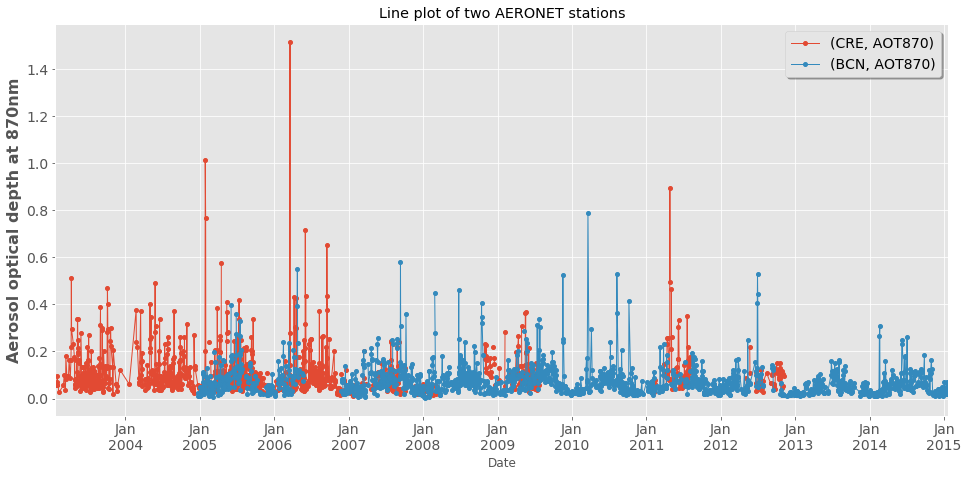

<Figure size 432x288 with 0 Axes>

In [52]:
#Line plots
ax=df1.plot(style='-o',markersize=4,linewidth=1.,figsize=(16,8),fontsize=14,title='Line plot of two AERONET stations',rot=0)

ax.set_ylabel('Aerosol optical depth at 870nm',fontweight='bold',fontsize=16) #y label

ax.legend(loc='best',fontsize=14,fancybox=True,shadow=True,numpoints=1) #Legend
ax.set_xticklabels(df1.index.year,ha='center') 
ax.xaxis.set_major_locator(dates.YearLocator()) #Sets automatically the years
ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y')) #Define the dates format in xaxis

plt.show() #Show the figure on the screen
plt.clf() #Clear memory

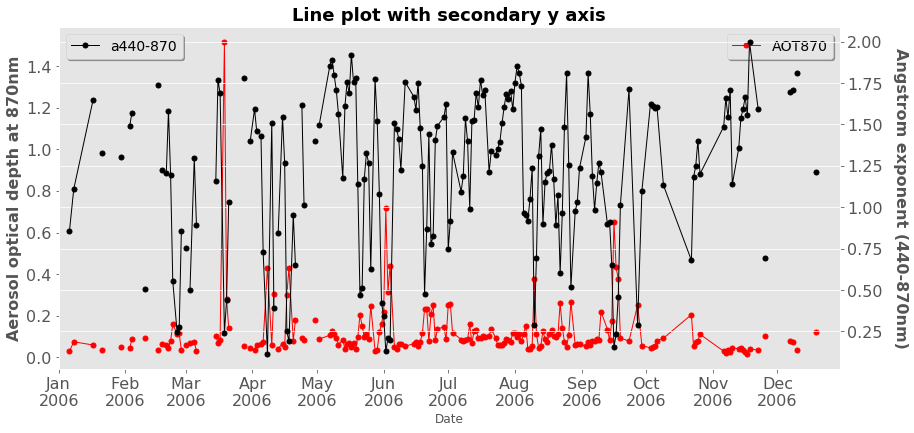

<Figure size 432x288 with 0 Axes>

In [53]:
#Line plots with second y-axis
plt.subplots(figsize=(14,7)) #Set the figure area

#Select year 2006
yearmask=AERONETmerg.index.year==2006 

##Plot two parameters from the AERONETmerg dataframe. The second one is plotted in the secondary_y axis
ax1=AERONETmerg['AOT870-CRE'][yearmask].plot(legend=True,style='r-o',markersize=5,linewidth=1.,label='AOT870')
ax2=AERONETmerg['a440-870-CRE'][yearmask].plot(secondary_y=True,style='k-o',legend=True,
                                               markersize=5,linewidth=1.,ax=ax1,label='a440-870')

#Plot figure's title
ax1.set_title('Line plot with secondary y axis',fontsize=18,fontweight='bold')

#Plot the two y labels
ax1.set_ylabel('Aerosol optical depth at 870nm',fontweight='bold',fontsize=16)
ax2.set_ylabel('Angstrom exponent (440-870nm)',fontweight='bold',fontsize=16,rotation=270,labelpad=25)

#Define the ticks size in both axes
ax1.tick_params(axis='both',labelsize=16)
ax2.tick_params(axis='both',labelsize=16)

#Set the legends for each parameter
ax1.legend(loc='best',fontsize=14,fancybox=True,shadow=True,numpoints=1)
ax2.legend(loc='best',fontsize=14,fancybox=True,shadow=True,numpoints=1)

#Define the date format and set the position on xticks
ax1.set_xticklabels(AERONETmerg[yearmask].index.year,ha='center',rotation=0) #Modify the xticks
ax1.xaxis.set_major_locator(dates.MonthLocator()) #Sets automatically the months
ax1.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y')) #Define the dates format in xaxis

plt.show()
plt.clf()

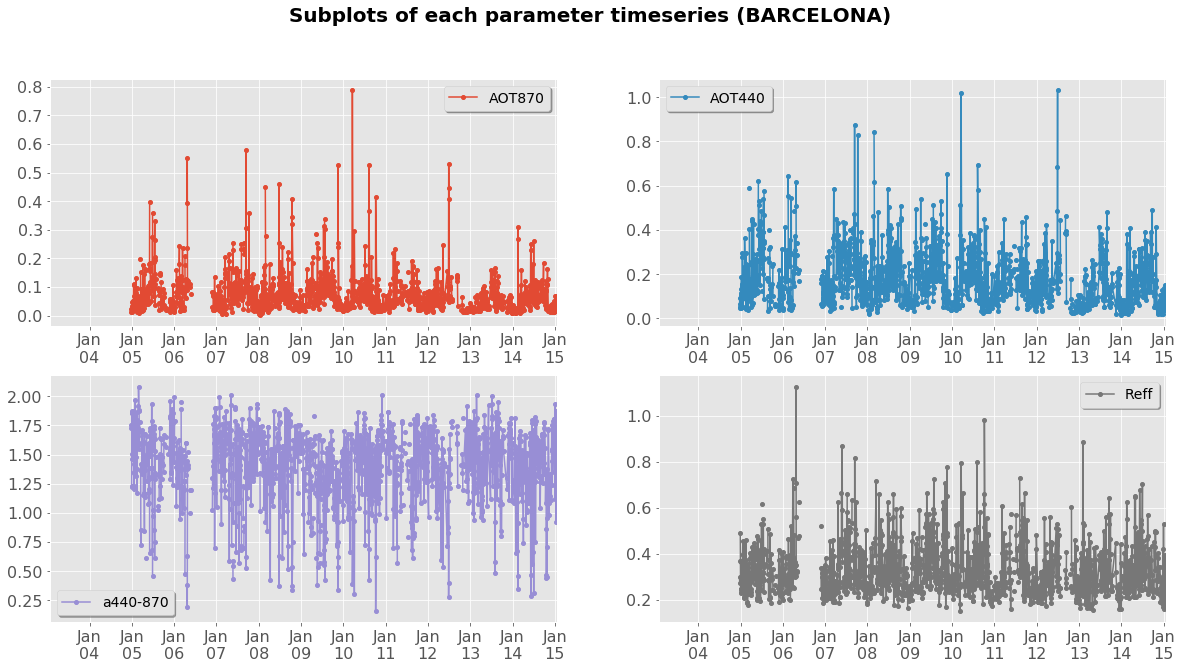

<Figure size 432x288 with 0 Axes>

In [54]:
#Subplots of timeseries
ax3=df3.plot(subplots=True,layout=(2,2),figsize=(20,10),fontsize=16,style='-o',markersize=4,sharex=False)

#Modify figures' features in each subplot
for row in np.arange(ax3.shape[0]):
    for col in np.arange(ax3.shape[1]):
        
        ax3[row,col].set_xlabel('') #Remove the label in x axis
        ax3[row,col].legend(loc='best',fontsize=14,fancybox=True,shadow=True,numpoints=1) #Modify the legend
        ax3[row,col].set_xticklabels(df3.index.year,ha='center',rotation=0) #Modify the xticks
        ax3[row,col].xaxis.set_major_locator(dates.YearLocator()) #Sets automatically the years
        ax3[row,col].xaxis.set_major_formatter(dates.DateFormatter('%b\n%y'))
        
plt.suptitle('Subplots of each parameter timeseries (BARCELONA)',fontsize=20,fontweight='bold') #Plot figure's main title

plt.show()
plt.clf()

In [55]:
np.arange(ax3.shape[0])

array([0, 1])

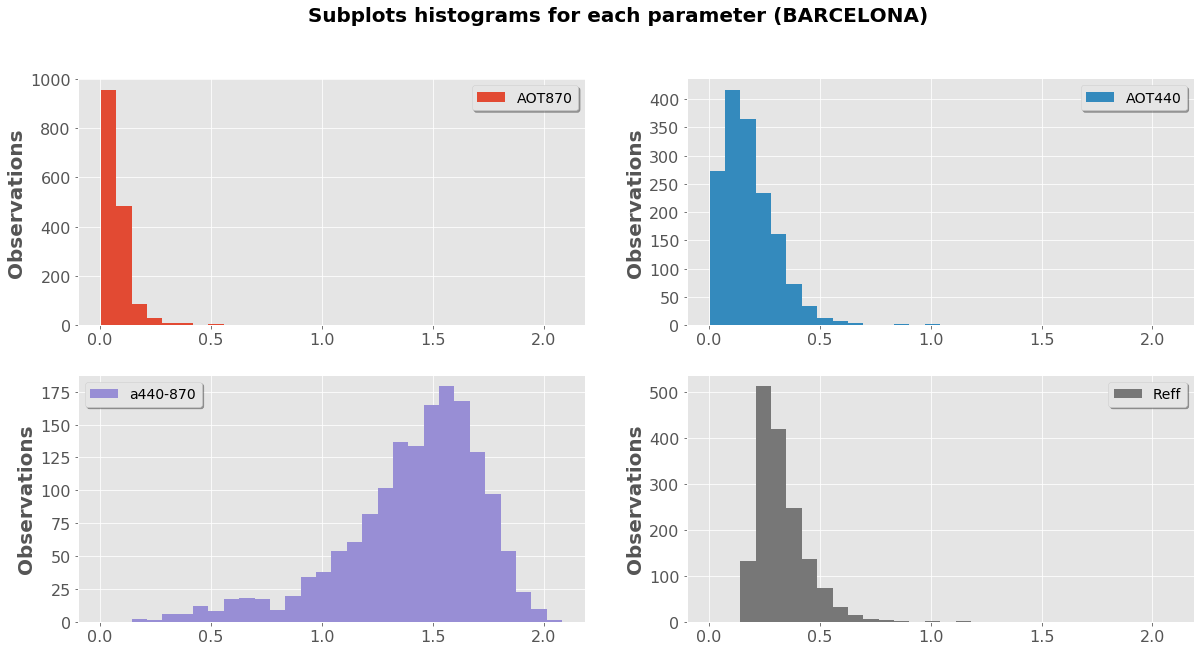

<Figure size 432x288 with 0 Axes>

In [56]:
#Subplots of histograms

ax4=df3.plot(kind='hist',subplots=True,layout=(2,2),figsize=(20,10),fontsize=16,bins=30,sharex=False)

#Modify figures' features in each position
for row in np.arange(ax4.shape[0]):
    for col in np.arange(ax4.shape[1]):
        
        ax4[row,col].set_xlabel('')
        ax4[row,col].set_ylabel('Observations',fontsize=20,fontweight='bold')
        ax4[row,col].legend(loc='best',fontsize=14,fancybox=True,shadow=True,numpoints=1)
       
plt.suptitle('Subplots histograms for each parameter (BARCELONA)',fontsize=20,fontweight='bold')

plt.show()
plt.clf()

/Users/Pep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
/Users/Pep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.


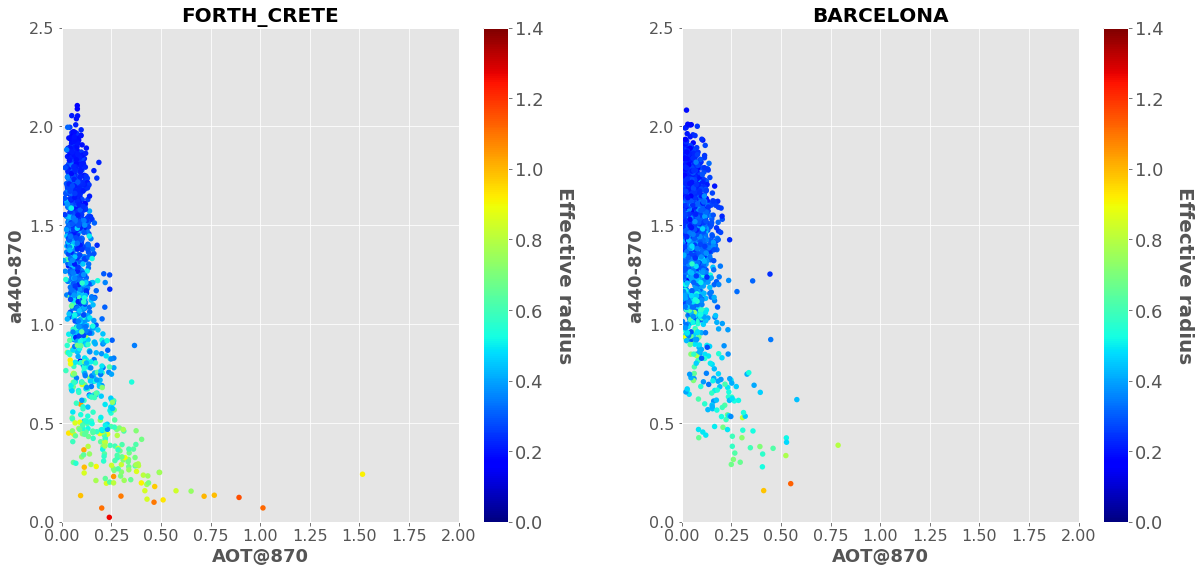

<Figure size 432x288 with 0 Axes>

In [57]:
#Scatterplots

fig = plt.figure(figsize=(20,20)) #Define figure's features 
plt.subplots_adjust(wspace=0.25) #Adjust the space between the two subplots

#Define the parameters which are going to be used for the visualization of your scatterplots
cbarmin=0;cbarmax=1.4 #Set the minimum and the maximum values which will be used in colorbars
cbar='jet' #Colorbar style
cbarlabel='Effective radius' #Colorbar label
s=30 #Markersize
lw=0. #Thickness of line around the markers
xlabel='AOT@870' #Set the x labels
ylabel='a440-870' #Set the y labels
xmin=0.;xmax=2.;ymin=0.;ymax=2.5 #Set the minimum and maximum limits in x and y axes

#Normalize the colors in the colorbar
norm = mpl.colors.Normalize(vmin=cbarmin, vmax=cbarmax)

#FIRST SUBPLOT (left side)
ax1 = fig.add_subplot(221) #Define the first subplot

#Set the title in the first subplot
ax1.set_title('FORTH_CRETE',fontsize=20,fontweight='bold')

#Plot the scatterplot in the first subplot (the name of this object is scatCRE)
scatCRE=ax1.scatter(AERONETmerg['AOT870-CRE'],AERONETmerg['a440-870-CRE'],c=AERONETmerg['Reff-CRE'],
                    norm=norm,cmap=cbar,s=s,lw=lw)

#Add the colorbar in the object scatCRE (scatterplot for CRE)
cb1 = plt.colorbar(scatCRE,norm=norm) 

cb1.set_label(cbarlabel, fontsize=20, fontweight='bold',rotation=270,labelpad=30) #Set colorbar label
cb1.set_clim(cbarmin,cbarmax) #Set colorbar limits
cb1.set_ticks(np.linspace(cbarmin,cbarmax,8)) #Define ticks position in the colorbar
cb1.ax.tick_params(labelsize=18) #Define the size of number in colorbar

ax1.tick_params(labelsize=16) #Size of the tick labels

ax1.set_xlim(xmin,xmax) #Set limits on x-axis
ax1.set_ylim(ymin,ymax) #Set limits on y-axis

ax1.set_xlabel(xlabel,fontsize=18,fontweight='bold') #Set x-axis label
ax1.set_ylabel(ylabel,fontsize=18,fontweight='bold') #Set y-axis label


#SECOND SUBPLOT (right side)
ax2 = fig.add_subplot(222) #Define the second subplot

ax2.set_title('BARCELONA',fontsize=20,fontweight='bold') #Set the title in the second subplot

#Plot the scatterplot in the first subplot (the name of this object is scatCRE)
scatBCN=ax2.scatter(AERONETmerg['AOT870-BCN'],AERONETmerg['a440-870-BCN'],c=AERONETmerg['Reff-BCN'],
                    norm=norm,cmap=cbar,s=s,lw=lw)

cb2 = plt.colorbar(scatBCN,norm=norm) #Add the colorbar in the object scatBCN (scatterplot for BCN)

cb2.set_label(cbarlabel, fontsize=20, fontweight='bold',rotation=270,labelpad=30)  #Set colorbar label
cb2.set_clim(cbarmin,cbarmax) #Set colorbar limits
cb2.set_ticks(np.linspace(cbarmin,cbarmax,8)) #Define ticks position in the colorbar
cb2.ax.tick_params(labelsize=18) #Define the size of number in colorbar

ax2.tick_params(labelsize=16) #Size of the tick labels

ax2.set_xlim(xmin,xmax) #Set limits on x-axis
ax2.set_ylim(ymin,ymax) #Set limits on y-axis

ax2.set_xlabel(xlabel,fontsize=18,fontweight='bold') #Set x-axis label
ax2.set_ylabel(ylabel,fontsize=18,fontweight='bold') #Set y-axis label

plt.show()
plt.clf()

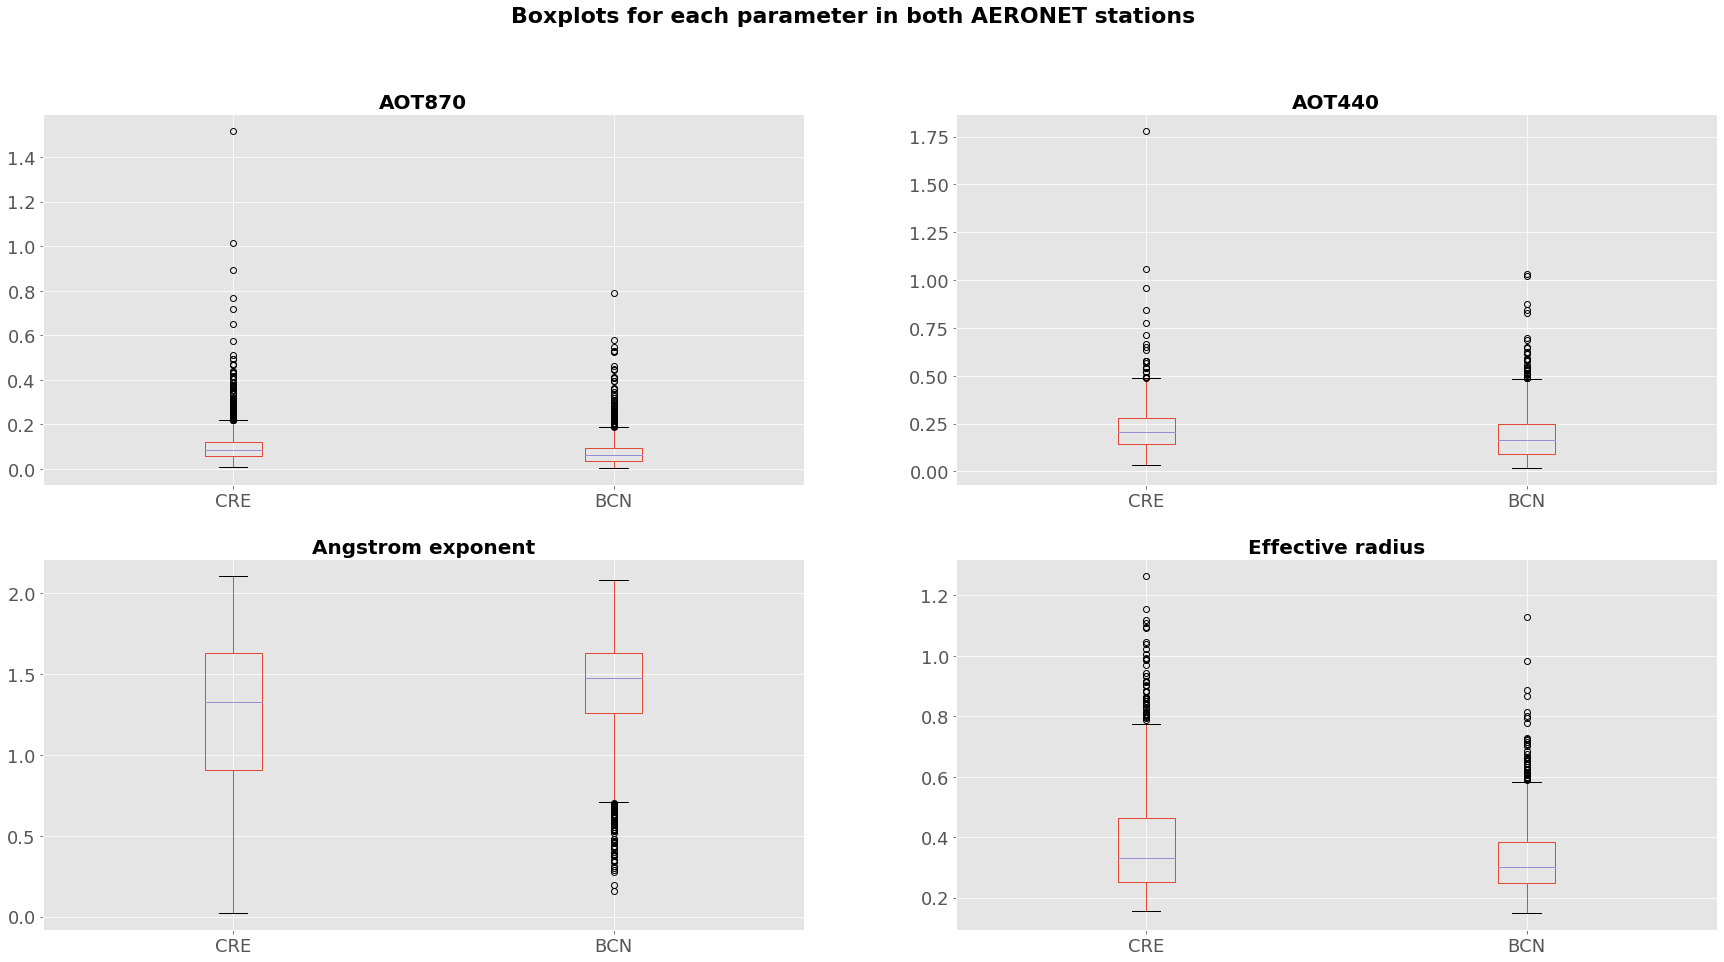

<Figure size 432x288 with 0 Axes>

In [58]:
##Boxplots
fig, ax = plt.subplots(2, 2,figsize=(30,15)) #Define figure's features
plt.subplots_adjust(wspace=0.2,hspace=0.2) #Adjust spaces between subplots

#Set figure's title
fig.suptitle('Boxplots for each parameter in both AERONET stations',fontsize=22,fontweight='bold')

#Boxplots for each parameter in each subplot
AERONETconc.xs('AOT870',level='Parameter',axis=1).plot(kind='box',ax=ax[0,0],fontsize=18)
AERONETconc.xs('AOT440',level='Parameter',axis=1).plot(kind='box',ax=ax[0,1],fontsize=18)
AERONETconc.xs('a440-870',level='Parameter',axis=1).plot(kind='box',ax=ax[1,0],fontsize=18)
AERONETconc.xs('Reff',level='Parameter',axis=1).plot(kind='box',ax=ax[1,1],fontsize=18)

#Set title in each subplot
ax[0,0].set_title('AOT870',fontsize=20,fontweight='bold')
ax[0,1].set_title('AOT440',fontsize=20,fontweight='bold')
ax[1,0].set_title('Angstrom exponent',fontsize=20,fontweight='bold')
ax[1,1].set_title('Effective radius',fontsize=20,fontweight='bold')

plt.show()
plt.clf()

# Functions describe(), resample() and groupby()

In [41]:
#Calculate the overall statistics of a dataframe (AERONETconc)
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html
pstats=AERONETconc.describe()
print(pstats)

Station            CRE                                                 BCN  \
Parameter       AOT870       AOT440     a440-870         Reff       AOT870   
count      1106.000000  1106.000000  1106.000000  1106.000000  1584.000000   
mean          0.110611     0.225370     1.234253     0.385570     0.075462   
std           0.100966     0.121585     0.483087     0.181841     0.065934   
min           0.010285     0.033217     0.022577     0.157000     0.003142   
25%           0.058233     0.141098     0.908266     0.252050     0.034505   
50%           0.083130     0.207785     1.329322     0.330500     0.060825   
75%           0.122754     0.279389     1.628155     0.464562     0.095717   
max           1.516289     1.777483     2.105658     1.264000     0.788406   

Station                                           
Parameter       AOT440     a440-870         Reff  
count      1584.000000  1584.000000  1584.000000  
mean          0.184029     1.410716     0.327224  
std           0

In [43]:
#Write the outputs to a csv file
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html

pstats.to_csv('AERONET-primary-statistics-results.txt',sep='\t',float_format='%10.3f')

In [44]:
print(AERONETconc.describe(percentiles=[0.05,0.25,0.75,0.95]))

Station            CRE                                                 BCN  \
Parameter       AOT870       AOT440     a440-870         Reff       AOT870   
count      1106.000000  1106.000000  1106.000000  1106.000000  1584.000000   
mean          0.110611     0.225370     1.234253     0.385570     0.075462   
std           0.100966     0.121585     0.483087     0.181841     0.065934   
min           0.010285     0.033217     0.022577     0.157000     0.003142   
5%            0.033893     0.083801     0.318030     0.201375     0.017144   
25%           0.058233     0.141098     0.908266     0.252050     0.034505   
50%           0.083130     0.207785     1.329322     0.330500     0.060825   
75%           0.122754     0.279389     1.628155     0.464562     0.095717   
95%           0.279979     0.420926     1.861167     0.760500     0.180633   
max           1.516289     1.777483     2.105658     1.264000     0.788406   

Station                                           
Parameter   

In [45]:
#Calculate monthly means from a dataframe (AERONETconc)
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html
#http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
print(AERONETconc.resample('MS',how='mean')) #Monthly mean values

Station          CRE                                     BCN            \
Parameter     AOT870    AOT440  a440-870      Reff    AOT870    AOT440   
Date                                                                     
2003-01-01  0.056841  0.098280  0.737026  0.545111       NaN       NaN   
2003-02-01  0.064211  0.086963  0.607627  0.659111       NaN       NaN   
2003-03-01  0.100896  0.272587  1.455162  0.361333       NaN       NaN   
2003-04-01  0.177697  0.306830  1.060744  0.508761       NaN       NaN   
2003-05-01  0.141706  0.238072  0.931390  0.475807       NaN       NaN   
2003-06-01  0.090648  0.246290  1.495360  0.276173       NaN       NaN   
2003-07-01  0.092657  0.248051  1.531143  0.282437       NaN       NaN   
2003-08-01  0.094207  0.264300  1.592903  0.285991       NaN       NaN   
2003-09-01  0.125268  0.254020  1.286826  0.429735       NaN       NaN   
2003-10-01  0.199309  0.291905  0.761352  0.668439       NaN       NaN   
2003-11-01  0.072563  0.140145  1.1159

/Users/Pep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  after removing the cwd from sys.path.


In [46]:
print(AERONETconc.resample('MS',how='count')) #Monthly counts

Station       CRE                         BCN                     
Parameter  AOT870 AOT440 a440-870 Reff AOT870 AOT440 a440-870 Reff
Date                                                              
2003-01-01      3      3        3    3      0      0        0    0
2003-02-01      3      3        3    3      0      0        0    0
2003-03-01      9      9        9    9      0      0        0    0
2003-04-01     11     11       11   11      0      0        0    0
2003-05-01     23     23       23   23      0      0        0    0
2003-06-01     28     28       28   28      0      0        0    0
2003-07-01     30     30       30   30      0      0        0    0
2003-08-01     24     24       24   24      0      0        0    0
2003-09-01     18     18       18   18      0      0        0    0
2003-10-01     15     15       15   15      0      0        0    0
2003-11-01      6      6        6    6      0      0        0    0
2003-12-01      1      1        1    1      0      0        0 

/Users/Pep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  """Entry point for launching an IPython kernel.


In [47]:
#Calculate the intra-annual variability
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
print(AERONETconc.groupby(AERONETconc.index.month).mean())

Station         CRE                                     BCN            \
Parameter    AOT870    AOT440  a440-870      Reff    AOT870    AOT440   
Date                                                                    
1          0.102878  0.153603  1.035771  0.538458  0.040414  0.115003   
2          0.090498  0.152296  1.052885  0.508833  0.062890  0.165530   
3          0.117638  0.222085  1.196238  0.436591  0.071323  0.175201   
4          0.148939  0.243599  0.984967  0.449306  0.093210  0.212999   
5          0.133463  0.240350  1.078601  0.388373  0.075932  0.176770   
6          0.097473  0.223437  1.390693  0.296029  0.117619  0.271443   
7          0.100673  0.243431  1.401651  0.292091  0.100539  0.244888   
8          0.100576  0.238869  1.381097  0.329475  0.097926  0.228471   
9          0.121152  0.245859  1.242526  0.424806  0.088790  0.227885   
10         0.123421  0.229320  1.077237  0.504771  0.076692  0.173142   
11         0.074947  0.147103  1.129972  0.502915  

# Useful weblinks
* Pandas tutorial: http://pandas.pydata.org/pandas-docs/stable/tutorials.html
* Timeseries/Date functionality: http://pandas.pydata.org/pandas-docs/stable/timeseries.html
* Timeseries analysis: 
    * http://earthpy.org/pandas-basics.html
    * http://earthpy.org/time_series_analysis_with_pandas_part_2.html
    * https://www.youtube.com/watch?v=0unf-C-pBYE
* Data analysis with pandas: https://www.youtube.com/watch?v=w26x-z-BdWQ
* Seaborn library (plots visualization):
    * https://stanford.edu/~mwaskom/software/seaborn/introduction.html
    * http://earthpy.org/category/visualization.html